# Graph Realization Problem

In [472]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from typing import Generator
from IPython.display import Markdown, display

import sys
sys.path.append("../")
from pltconfig import config_plt

config_plt()

## A Lemma

In [473]:
G = nx.Graph()

G.add_edge(1, 2)
G.add_edge(3, 4)

G.add_edge(1, 4)
G.add_edge(3, 2)

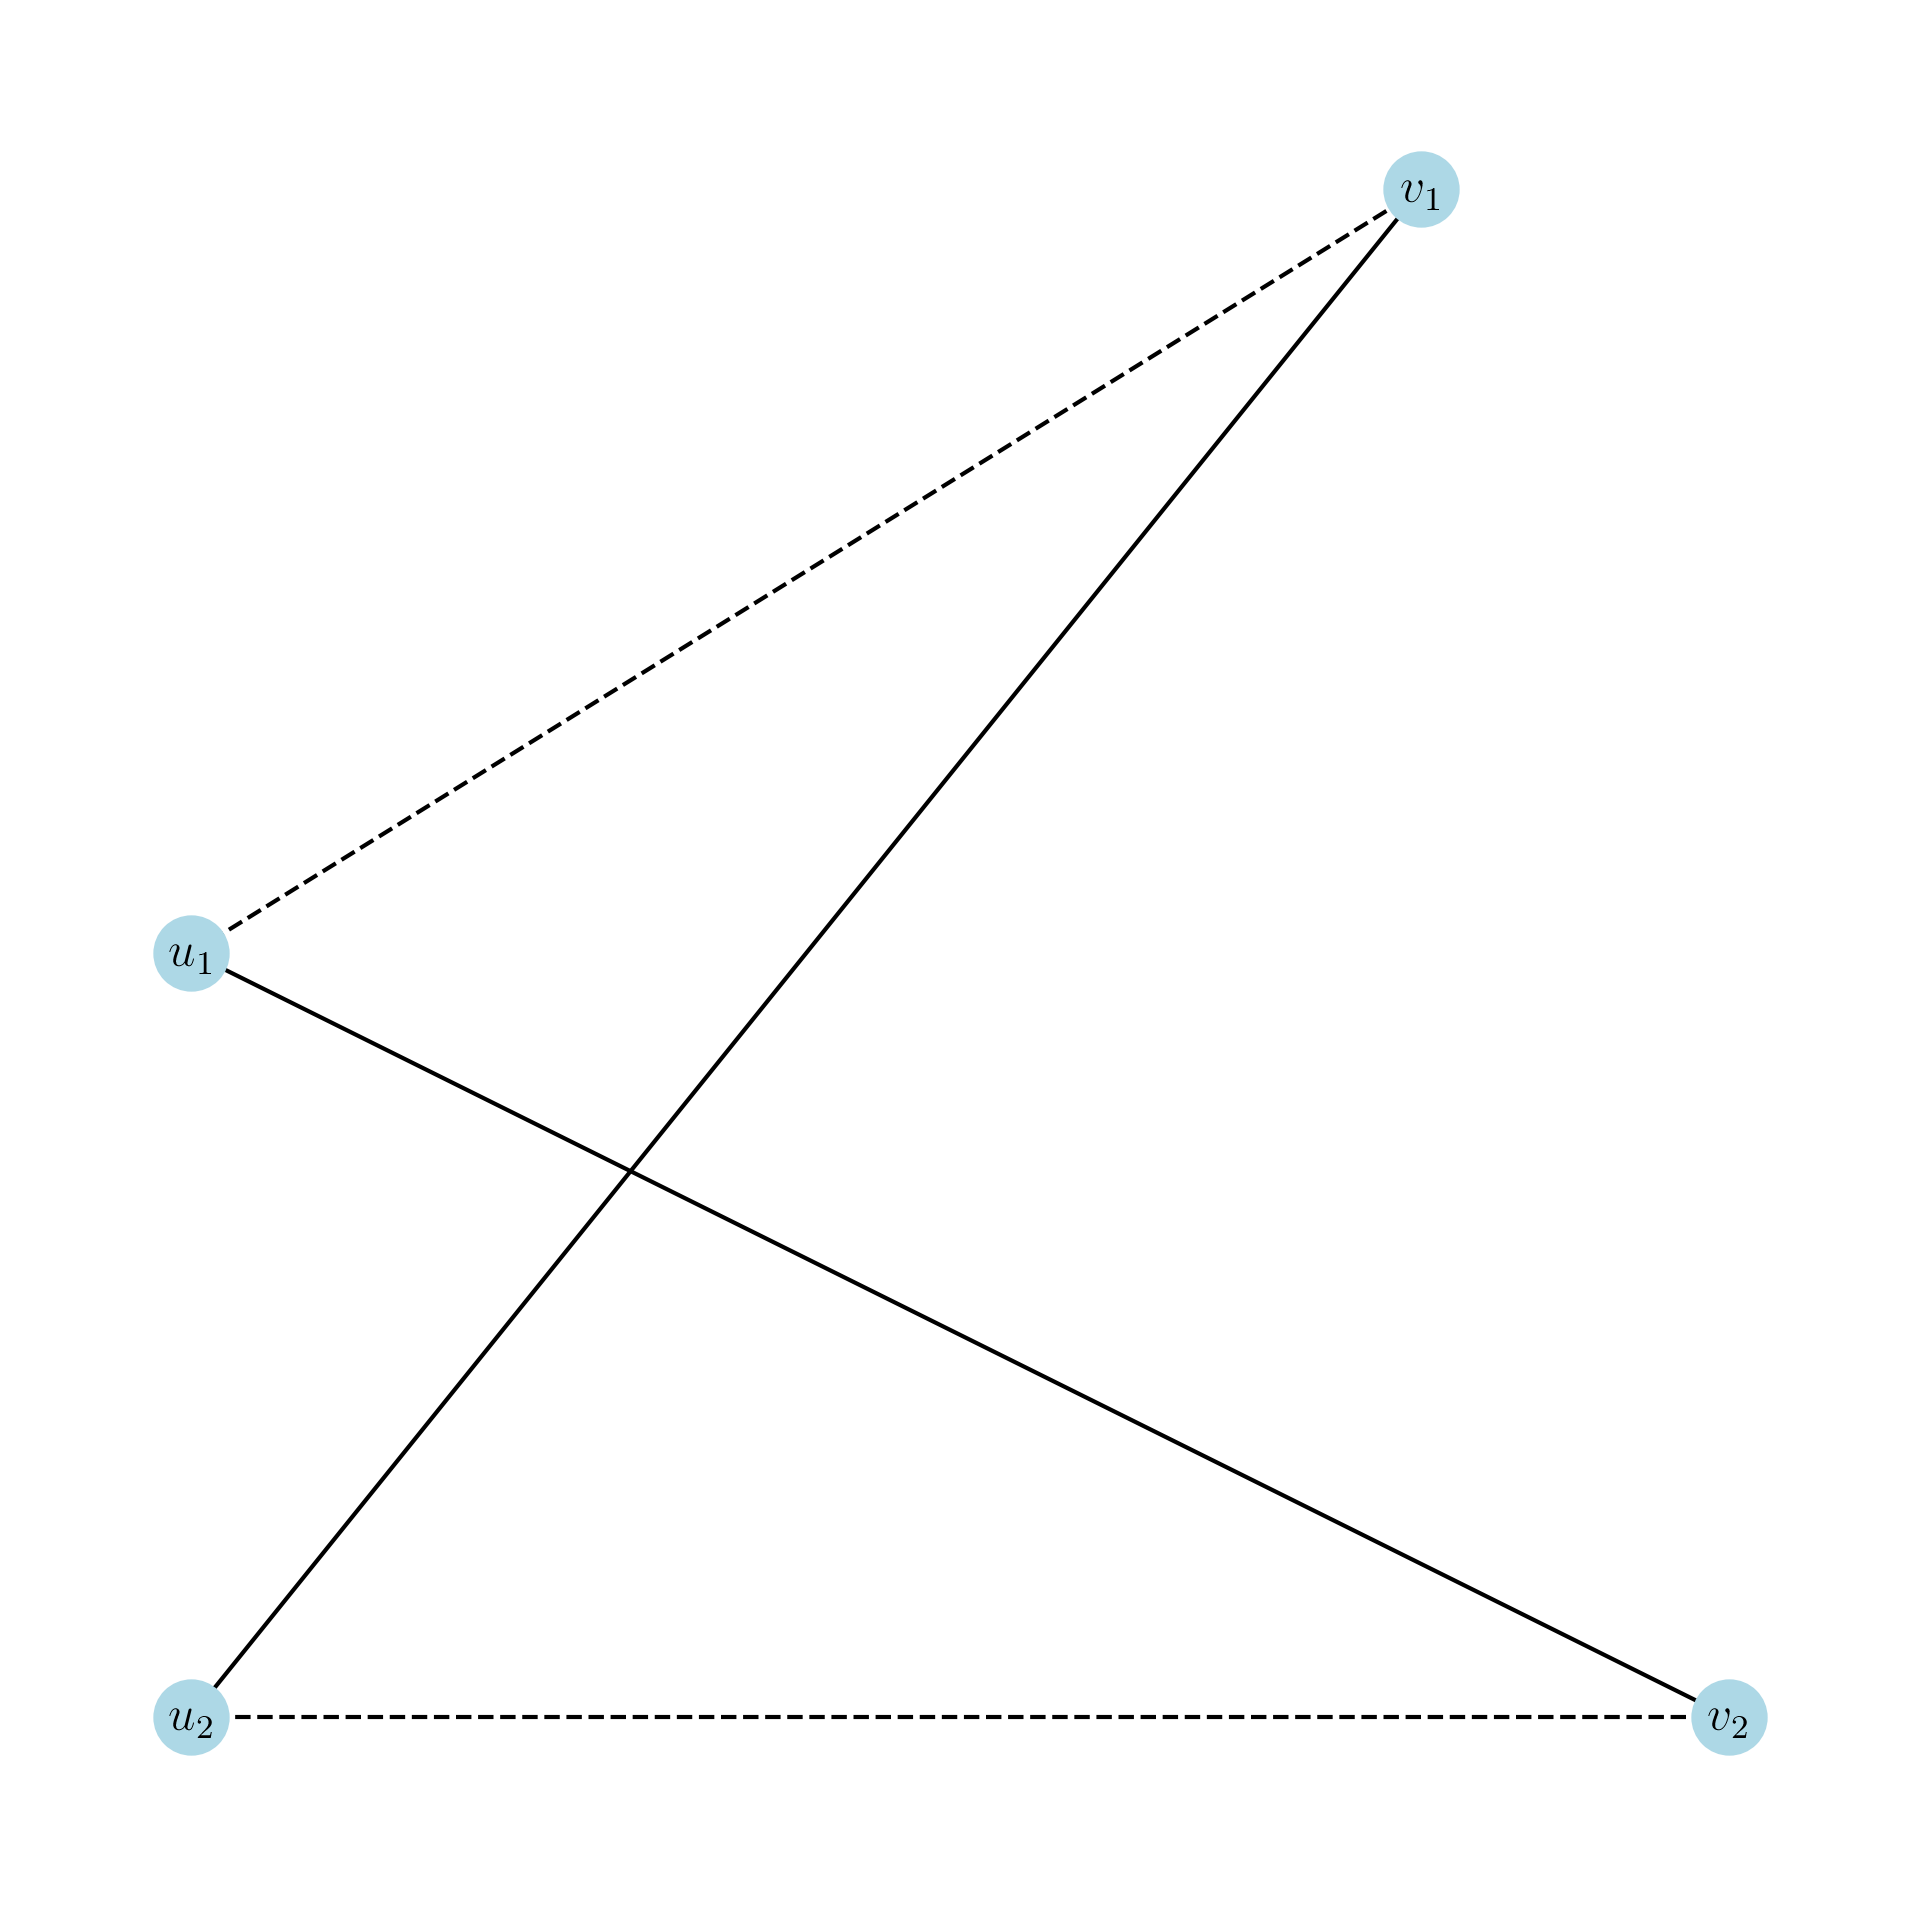

In [495]:
np.random.seed(2)

fig, ax = plt.subplots(figsize=(8, 8), dpi=300)

pos = {
    1: np.array([0.1, 0.3]),
    2: np.array([0.5, 0.5]),
    3: np.array([0.1, 0.1]),
    4: np.array([0.6, 0.1])
}

nx.draw_networkx_nodes(
    G, pos,
    ax=ax,
    node_color="lightblue"
)

nx.draw_networkx_labels(
    G, pos,
    ax=ax,
    labels={1: "$u_1$", 2: "$v_1$", 3: "$u_2$", 4: "$v_2$"}
)

nx.draw_networkx_edges(
    G, pos,
    ax=ax,
    edgelist=[(1, 2), (3, 4)],
    style="--"
)

nx.draw_networkx_edges(
    G, pos,
    ax=ax,
    edgelist=[(1, 4), (2, 3)],
)

ax.set_frame_on(False)
plt.savefig(
    "../../tex/figures/g-007.png",
    bbox_inches="tight",
    pad_inches=0
)
plt.show()

In [483]:
pos

{1: array([0.4359949 , 0.02592623], dtype=float32),
 2: array([0.5496625, 0.4353224], dtype=float32),
 3: array([0.4203678, 0.3303348], dtype=float32),
 4: array([0.20464863, 0.619271  ], dtype=float32)}

## Havel-Hakimi Algorithm

In [454]:
def havel_hakimi(deg_seq: list[int]) -> nx.Graph | None:
    
    n = len(deg_seq)
    
    argsort = lambda A : sorted(
        range(len(A)),
        key=lambda i : A[i],
        reverse=True
    )
    
    # indices = argsort(deg_seq)
    deg_seq = sorted(deg_seq, reverse=True)
    
    d1 = deg_seq[0]
    print(f"n = {n}")
    print(f"d max = {d1}")
    print(f"deg seq = {deg_seq}")
    
    if d1 == 0:
        G = nx.Graph()
        for j in range(1, n + 1):
            G.add_node(j)
        print(G.nodes)
        return G
    
    # if d1 + 1 > n:
    #     return None
    
    if deg_seq[d1] == 0:
        return None
    
    deg_seq = deg_seq[1:]
    
    for j in range(d1):
        deg_seq[j] -= 1
    G = havel_hakimi(deg_seq)
    
    if G is None:
        return None
    
    for j in range(d1):
        
        G.add_edge(n, n-j-1)
    
    return G

In [455]:
def havel_hakimi(vertex2degree: dict[object, int]) -> nx.Graph | None:
    
    vertex2degree = dict(sorted(
        vertex2degree.items(),
        key=lambda item : item[1],
        reverse=True
    ))
    
    
    v, deg_max = list(vertex2degree.items())[0]
    
    if deg_max == 0:
        G = nx.Graph()
        for v in vertex2degree.keys():
            G.add_node(v)
        return G
    
    vertex2degree.pop(v)
    
    if len(vertex2degree) < deg_max:
        return None
    
    neighbors = list(vertex2degree.keys())[:deg_max]
    
    for w in neighbors:
        vertex2degree[w] -= 1
        if vertex2degree[w] < 0:
            return None
        
    G = havel_hakimi(vertex2degree)
    
    if G is None:
        return None
    
    for w in neighbors:
        G.add_edge(v, w)
    
    return G

In [456]:
def make_vertex2degree(deg_seq: list[int]) -> dict[object, int]:
    vertex2degree = {}
    for j, deg in enumerate(deg_seq):
        vertex2degree[j + 1] = deg
    return vertex2degree

def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))

In [457]:
def gen_inc_seq(n: int) -> Generator[list[int], None, None]:
    """Generate an increasing sequence of non-negative integers.

    Parameters
    ----------
        n (int): Length of the sequence.

    Yields
    ------
        Generator[list[int], None, None]: Increasing sequence.
    """
    
    seq = [0] * n
    yield seq
    
    i = 0
    while True:

        # current integer is the last one,
        # or it is less than the next integer
        if i == n - 1 or seq[i] < seq[i + 1]:
            # increment the i-th integer
            seq[i] += 1
            
            # zero out all the preceding numbers
            for j in range(i):
                seq[j] = 0
                
            # set index back to 0
            i = 0

        # cannot increment this integer
        # go to the next one
        else:
            i = i + 1
            continue
            
        yield seq

seq = gen_inc_seq(4)

In [468]:
graphical_deg_seqs = []

NON_GRAPHICAL_SEQ_COUNT_THRES = 10000

for n in range(3, 9):
    
    seq = gen_inc_seq(n)
    
    non_graphical_seq_count = 0
    
    for deg_seq in seq:
        
        G = havel_hakimi(make_vertex2degree(deg_seq))
        if G is not None: 
            graphical_deg_seqs.append(deg_seq.copy())
        else:
            non_graphical_seq_count += 1
            
        if non_graphical_seq_count >= NON_GRAPHICAL_SEQ_COUNT_THRES:
            break

In [469]:
deg_seq = graphical_deg_seqs[-70]
deg_seq

[2, 4, 5, 5, 5, 5, 7, 7]

In [470]:
G = havel_hakimi(make_vertex2degree(deg_seq))

if G is not None:
    printmd("The degree sequence is graphical.", color="green")
else:
    printmd("The degree sequence is NOT graphical!", color="red")

<span style='color:green'>The degree sequence is graphical.</span>

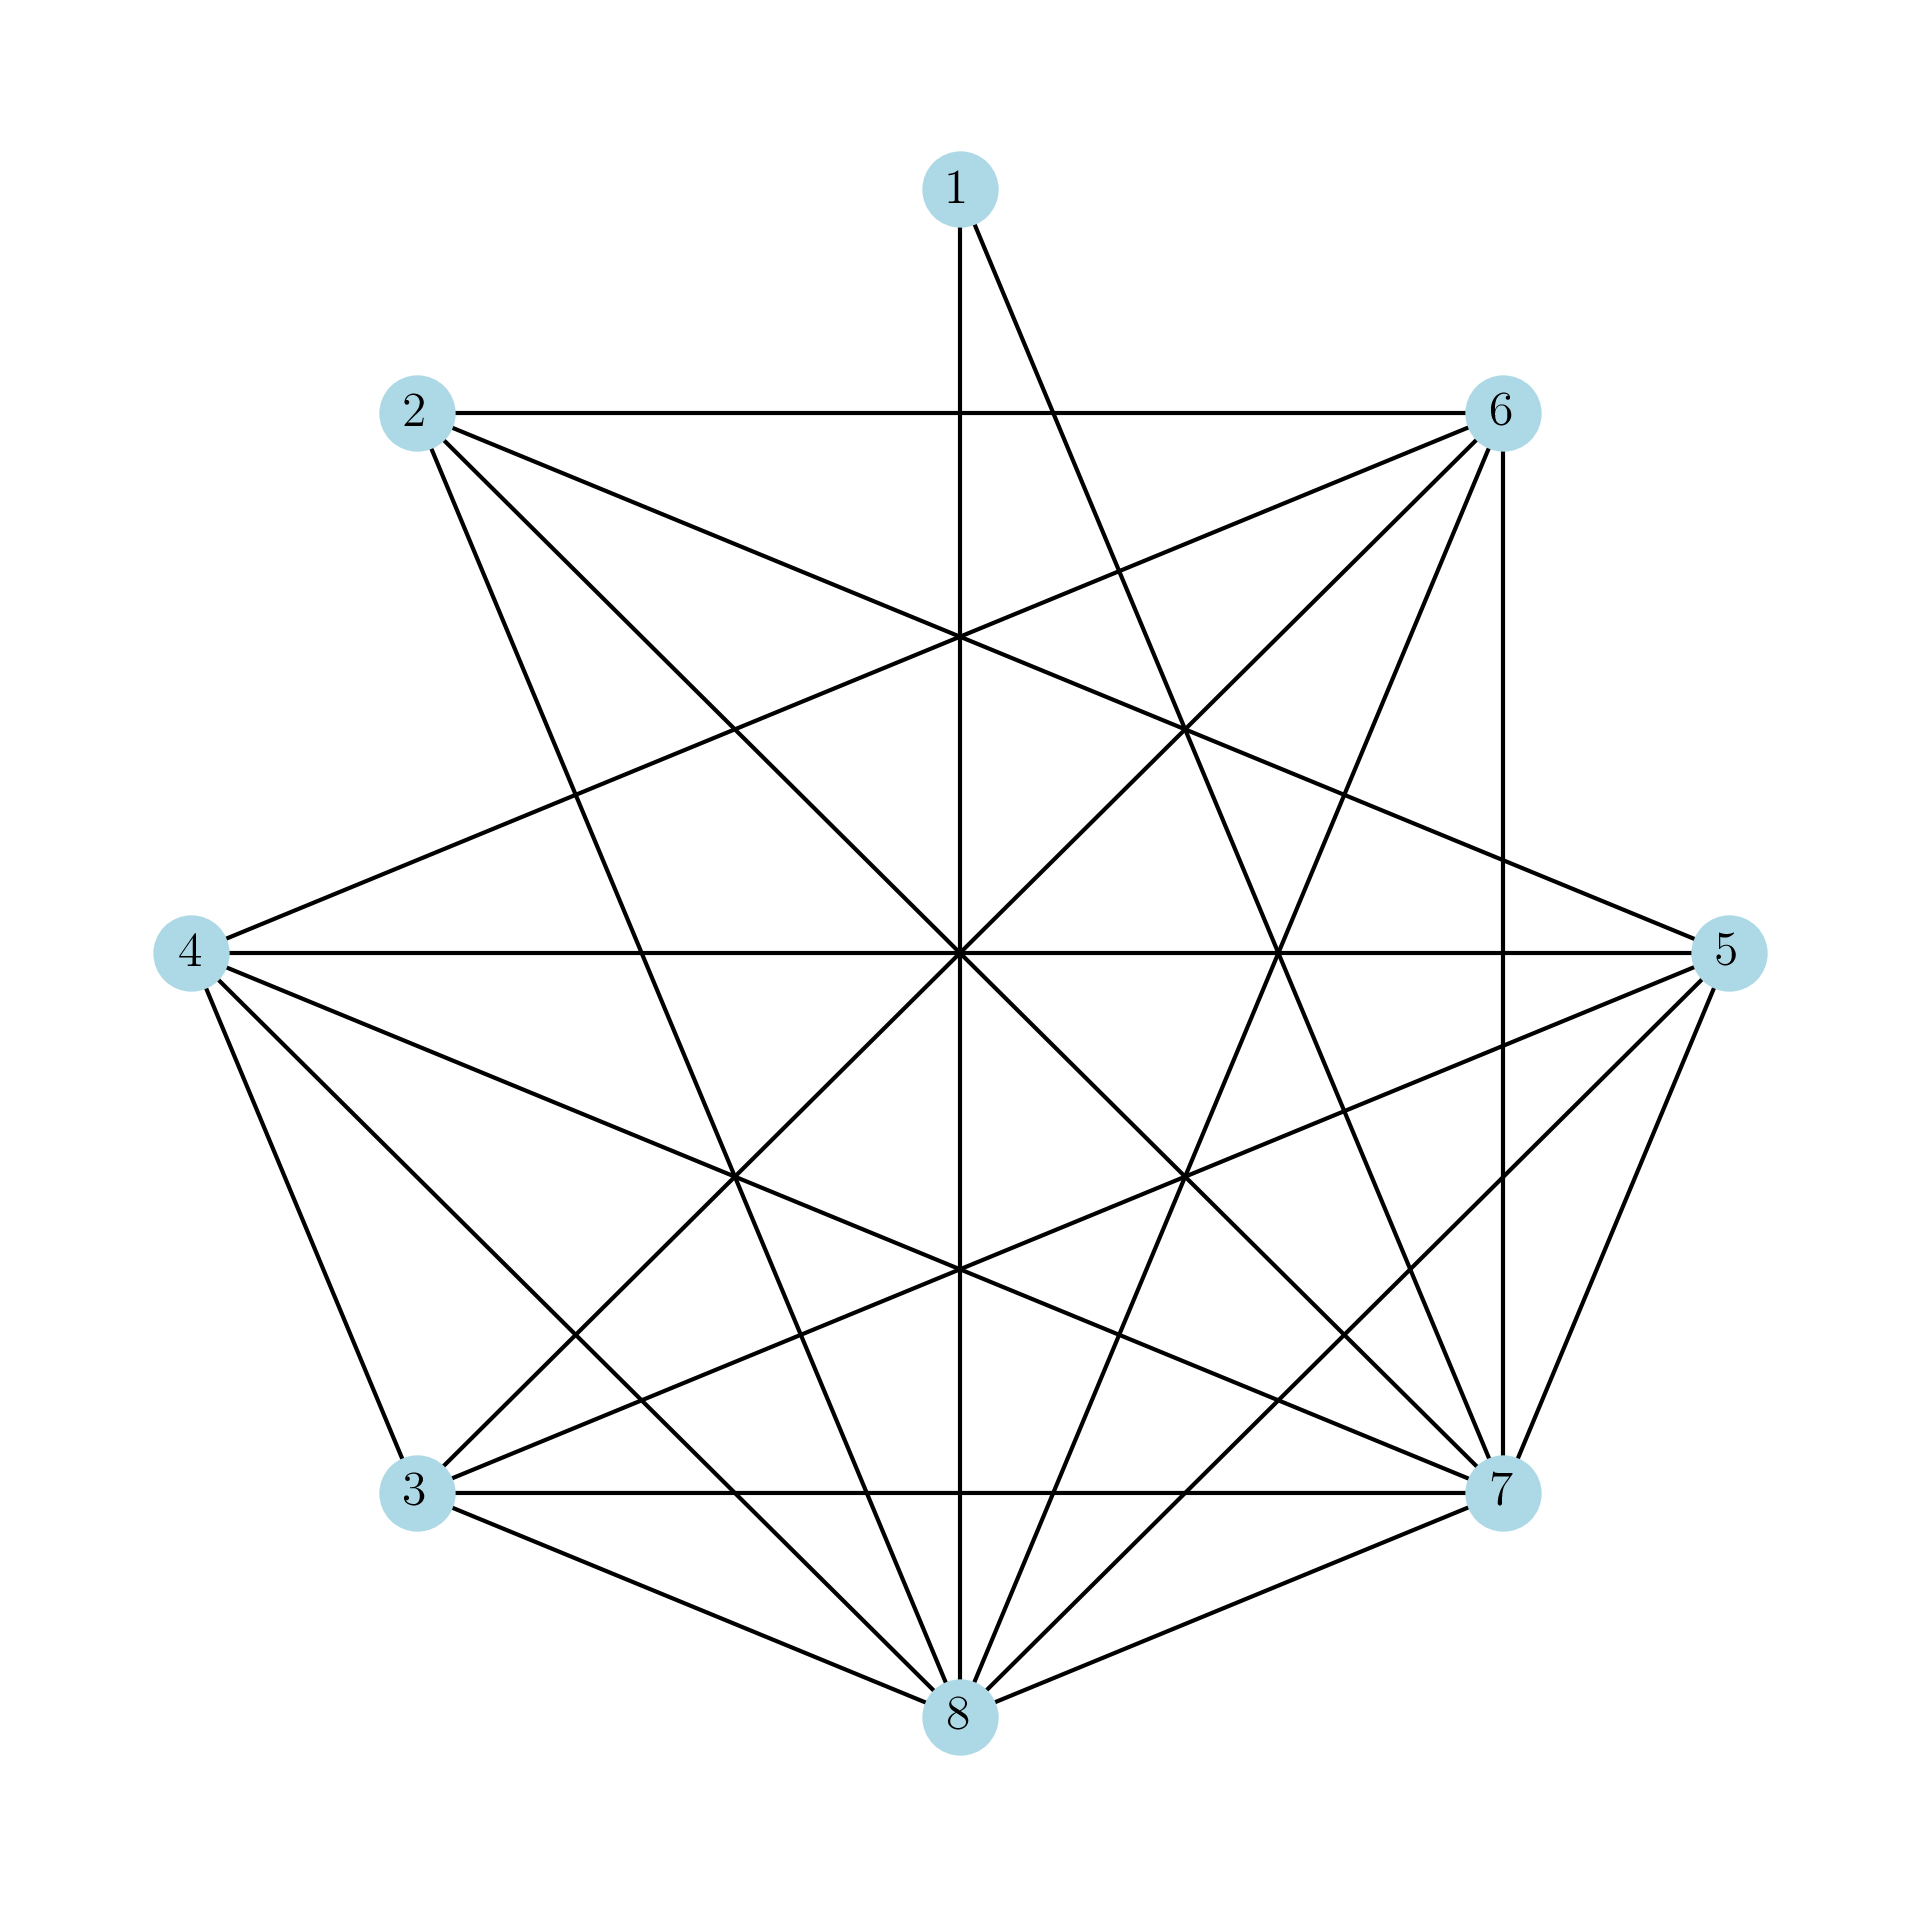

In [471]:
np.random.seed(0)

fig, ax = plt.subplots(figsize=(8, 8), dpi=300)

pos = nx.circular_layout(G)

nx.draw_networkx_nodes(
    G, pos,
    ax=ax,
    node_color="lightblue"
)

nx.draw_networkx_labels(
    G, pos,
    ax=ax
)

edges = set(G.edges)

nx.draw_networkx_edges(
    G, pos,
    ax=ax,
    edgelist=edges,
)

ax.set_frame_on(False)
# plt.savefig(
#     "../../tex/figures/g-005.png",
#     bbox_inches="tight",
#     pad_inches=0
# )
plt.show()